## Exploratory Analysis of Reddit Posts in r/mentalhealth

Steps:
1. Data Cleaning/ Wrangling
    a. Data is filtered for "Need Support" and "Venting". 
    b. Missing text data is filtered out
    c. Dataset has 1040 total posts: 520 posts for each catagory. The dataset for the final analysis will be significantly larger
2. Descriptive statistics on post length 
3. Top words in each catagory 
4. Tops words that are unique to each catagory
5. Sentiment Analysis 



### Data Cleaning

In [94]:
import pandas as pd
import statistics
import numpy as np
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
import regex as re
from collections import defaultdict
import matplotlib.pyplot as plt
from NLP_MH import DataIngest
import pickle

In [95]:
df = pd.read_csv("NLP_MH/mh_clean.csv")

In [96]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [97]:
df.dropna(subset=['body'], inplace=True)

In [98]:
DataIngest.writePickle(df, "MH_DF_1", "ML_Data/")

pickle complete


In [99]:
df

,label,body,body_stem_sw
0,Venting,last april after i found out my ex had lied to...,last april found ex lie upset thing complet br...
1,Venting,i have an issue that has affected my life for ...,issu affect life long time i'm 19 year old alw...
2,Venting,i wouldn t even know where to start i know mor...,even know start know wrong confirm time ago so...
3,Venting,well another concert even immediately after i ...,well anoth concert even immedi snap back bpd m...
4,Venting,i just need to get this off my chest i feel li...,need get chest feel like peopl tell lest scare...
...,...,...,...
48880,Need Support,m22 i work full time and i'm trying to fill ou...,m22 work full time i'm tri fill applic grad sc...
48881,Venting,i already made a few posts here but its gettin...,alreadi made post get wors wors everyday feel ...
48882,Need Support,hi all ta account i am forced to live with som...,hi ta account forc live someon narcissist beha...
48883,Venting,yesterday i needed to take the train somewhere...,yesterday need take train somewher stood stati...


In [100]:
def clean_txt(str_in):
    import re
    test_str_fix_o = None
    try:
        if str_in.startswith('"') and str_in.endswith('"'):
            str_in = str_in[1:-1]
        test_str_fix_o = re.sub("[^A-Za-z0-9']+", " ", str_in).strip()
        test_str_fix_o = test_str_fix_o.lower()
        #return test_str_fix_o
    except:
        print ("You can only input a string and not a", type(str_in))
        pass
    return test_str_fix_o

In [168]:
def rem_sw(str_in):
    from nltk.corpus import stopwords
    sw = stopwords.words('english')
    sw.append("like")
    #create a function called rem_sw that inputs arbitrary text, 
    #removes stopwords
    #and returns string contenated tokene that are left
    tmp_list = list()
    for w in str_in.split():
        if w not in sw:
            tmp_list.append(w)
    fin_txt = ' '.join(tmp_list)
    return fin_txt

In [102]:
def stem_fun(str_in):
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    tmp = [ps.stem(word) for word in str_in.split()]
    tmp = ' '.join(tmp)
    return tmp

In [103]:
def tokenize_text(str_in):
    return str_in.split()

In [104]:
def clean_df(df_new):
    df_new = df_new.reset_index(drop=True)
    for i in range(len(df_new)):
        label = df_new.loc[i, "label"]
        if label.startswith('"') and label.endswith('"'):
            df_new.loc[i, "label"] = label[1:-1]
        text = df_new.loc[i, "body"]
        text = clean_txt(text)
        text = rem_sw(text)
        df_new.loc[i, "body"] = text
    return df_new

In [105]:
vent_df = df[df["label"] == "Venting"]
ns_df = df[df["label"] == "Need Support"]

In [106]:
def word_vec(documents):
    # Create a CountVectorizer instance
    vectorizer = CountVectorizer()
    word_count_vectors = vectorizer.fit_transform(documents)
    # Convert the word count vectors to an array
    word_count_array = word_count_vectors.toarray()

    # Get the feature names (words) from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Create a dictionary to store feature names and their counts
    features_counts = {}

    # Iterate through each feature and its index, then get the sum of counts across all documents
    for i, feature_name in enumerate(feature_names):
        feature_count = np.sum(word_count_array[:, i])  # Sum counts across all documents for the current feature
        features_counts[feature_name] = feature_count

    # Print the dictionary of feature names and their counts
    return(features_counts)

In [107]:
def word_freq_vec(documents):
    # Create a CountVectorizer instance
    vectorizer = CountVectorizer()
    word_count_vectors = vectorizer.fit_transform(documents)
    # Convert the word count vectors to an array
    word_count_array = word_count_vectors.toarray()

    # Get the feature names (words) from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Create a dictionary to store feature names and their counts
    features_counts = {}

    # Iterate through each feature and its index, then get the sum of counts across all documents
    for i, feature_name in enumerate(feature_names):
        feature_count = np.sum(word_count_array[:, i])  # Sum counts across all documents for the current feature
        features_counts[feature_name] = feature_count

    # Print the dictionary of feature names and their counts
    return(features_counts)

In [108]:
vent_df["body"]

0        last april after i found out my ex had lied to...
1        i have an issue that has affected my life for ...
2        i wouldn t even know where to start i know mor...
3        well another concert even immediately after i ...
4        i just need to get this off my chest i feel li...
                               ...                        
48877    so i 20f feel a lot of pain mentally and prett...
48878    sorry if it's the wrong place to post this soc...
48879    2022 was filled with many downs i've gone thro...
48881    i already made a few posts here but its gettin...
48883    yesterday i needed to take the train somewhere...
Name: body, Length: 22779, dtype: object

In [169]:
vent_df["body_sw"] = vent_df["body"].apply(lambda x: rem_sw(x))

/var/folders/fr/g38hffys3lbdjhb5h18vy6nh0000gn/T/ipykernel_97796/2924245178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vent_df["body_sw"] = vent_df["body"].apply(lambda x: rem_sw(x))


In [110]:
len(vent_df)

22779

In [111]:
len(ns_df)

26051

In [121]:
vent_dict_body = word_vec(vent_df["body"])

In [122]:
ns_dict_body = word_vec(ns_df["body"])

In [112]:
vent_dict = word_vec(vent_df["body_sw"])

In [170]:
ns_df["body_sw"] = ns_df["body"].apply(lambda x: rem_sw(x))

/var/folders/fr/g38hffys3lbdjhb5h18vy6nh0000gn/T/ipykernel_97796/60173868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ns_df["body_sw"] = ns_df["body"].apply(lambda x: rem_sw(x))


In [114]:
ns_dict = word_vec(ns_df["body_sw"])

In [115]:
ns_dict_max = {}
for key, value in ns_dict.items():
    if value > 2000:
        ns_dict_max[key] = value

In [116]:
ns_dict_max.items

<function dict.items>

### Top Venting Words

In [117]:
from operator import itemgetter
del vent_dict['ve']
vent_top = dict(sorted(vent_dict.items(), key=itemgetter(1), reverse=True)[:15])
print(vent_top)

{'like': 46453, 'feel': 37136, 'know': 26856, 'get': 23871, 'want': 23677, 'even': 22028, 'time': 19646, 'people': 19093, 'really': 18300, 'life': 17268, 'one': 15405, 'would': 14585, 'things': 13591, 'think': 13294, 'never': 12564}


### Top Need Support Words

In [118]:
del ns_dict['ve']
ns_top = dict(sorted(ns_dict.items(), key=itemgetter(1), reverse=True)[:15])
print(ns_top)

{'like': 46791, 'feel': 38476, 'know': 31108, 'get': 25328, 'want': 24353, 'really': 22100, 'even': 21472, 'time': 20919, 'life': 17579, 'help': 17143, 'would': 16404, 'people': 15595, 'things': 15339, 'one': 14719, 'think': 14113}


In [28]:
set(ns_top.keys()).intersection(set(vent_top.keys())) 

{'even',
 'feel',
 'get',
 'know',
 'life',
 'like',
 'one',
 'people',
 'really',
 'things',
 'think',
 'time',
 'want',
 'would'}

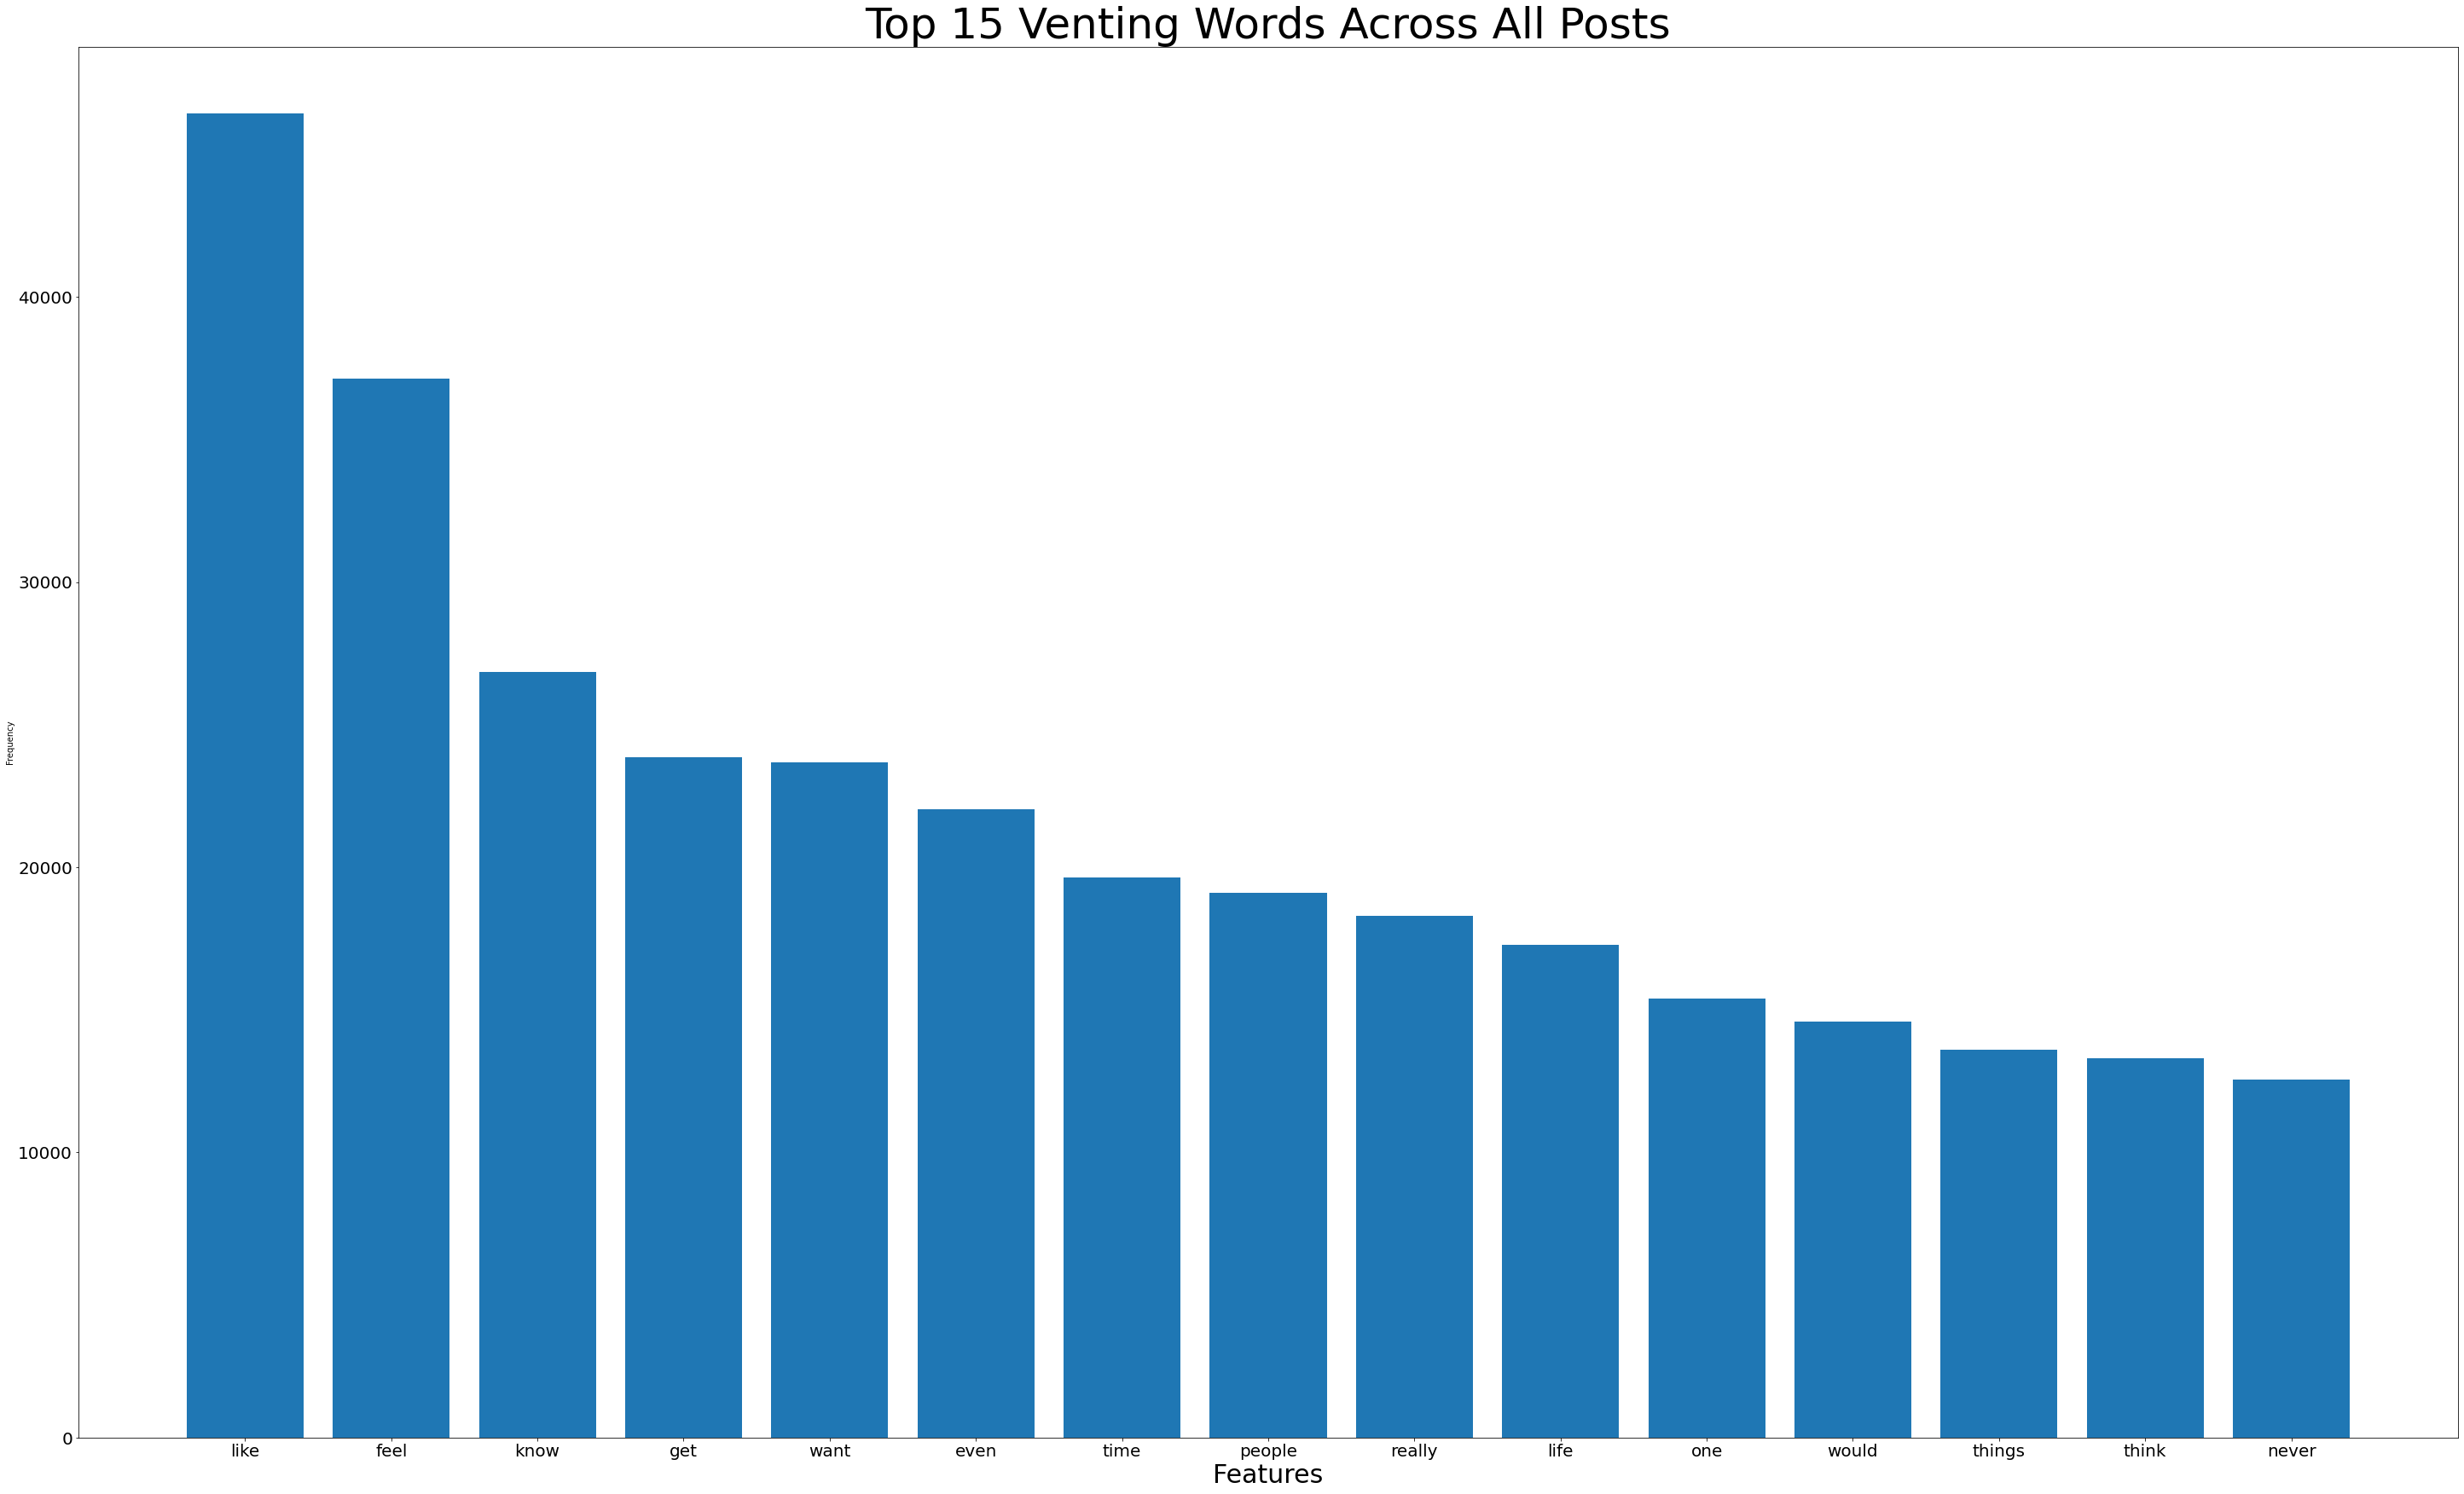

In [29]:
# Extract keys and values from the dictionary
keys = list(vent_top.keys())
values = list(vent_top.values())

# Plot the bar graph
plt.figure(figsize=(50, 30))
plt.bar(keys, values)
plt.xticks(fontsize=20)  # Adjust the font size of the x-axis tick labels
plt.yticks(fontsize=20)
# Add labels and title
plt.xlabel('Features', fontsize = 30)
plt.ylabel('Frequency')
plt.title('Top 15 Venting Words Across All Posts', fontsize=50)

# Show the plot
plt.show()

keys_vent = keys
count_vent = values

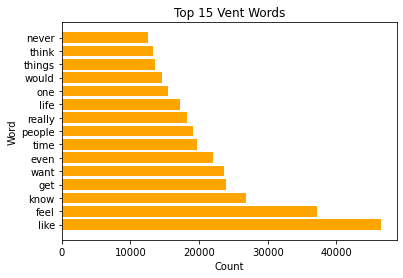

In [30]:
plt.barh(keys_vent, count_vent, color='orange')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 15 Vent Words')
plt.show()

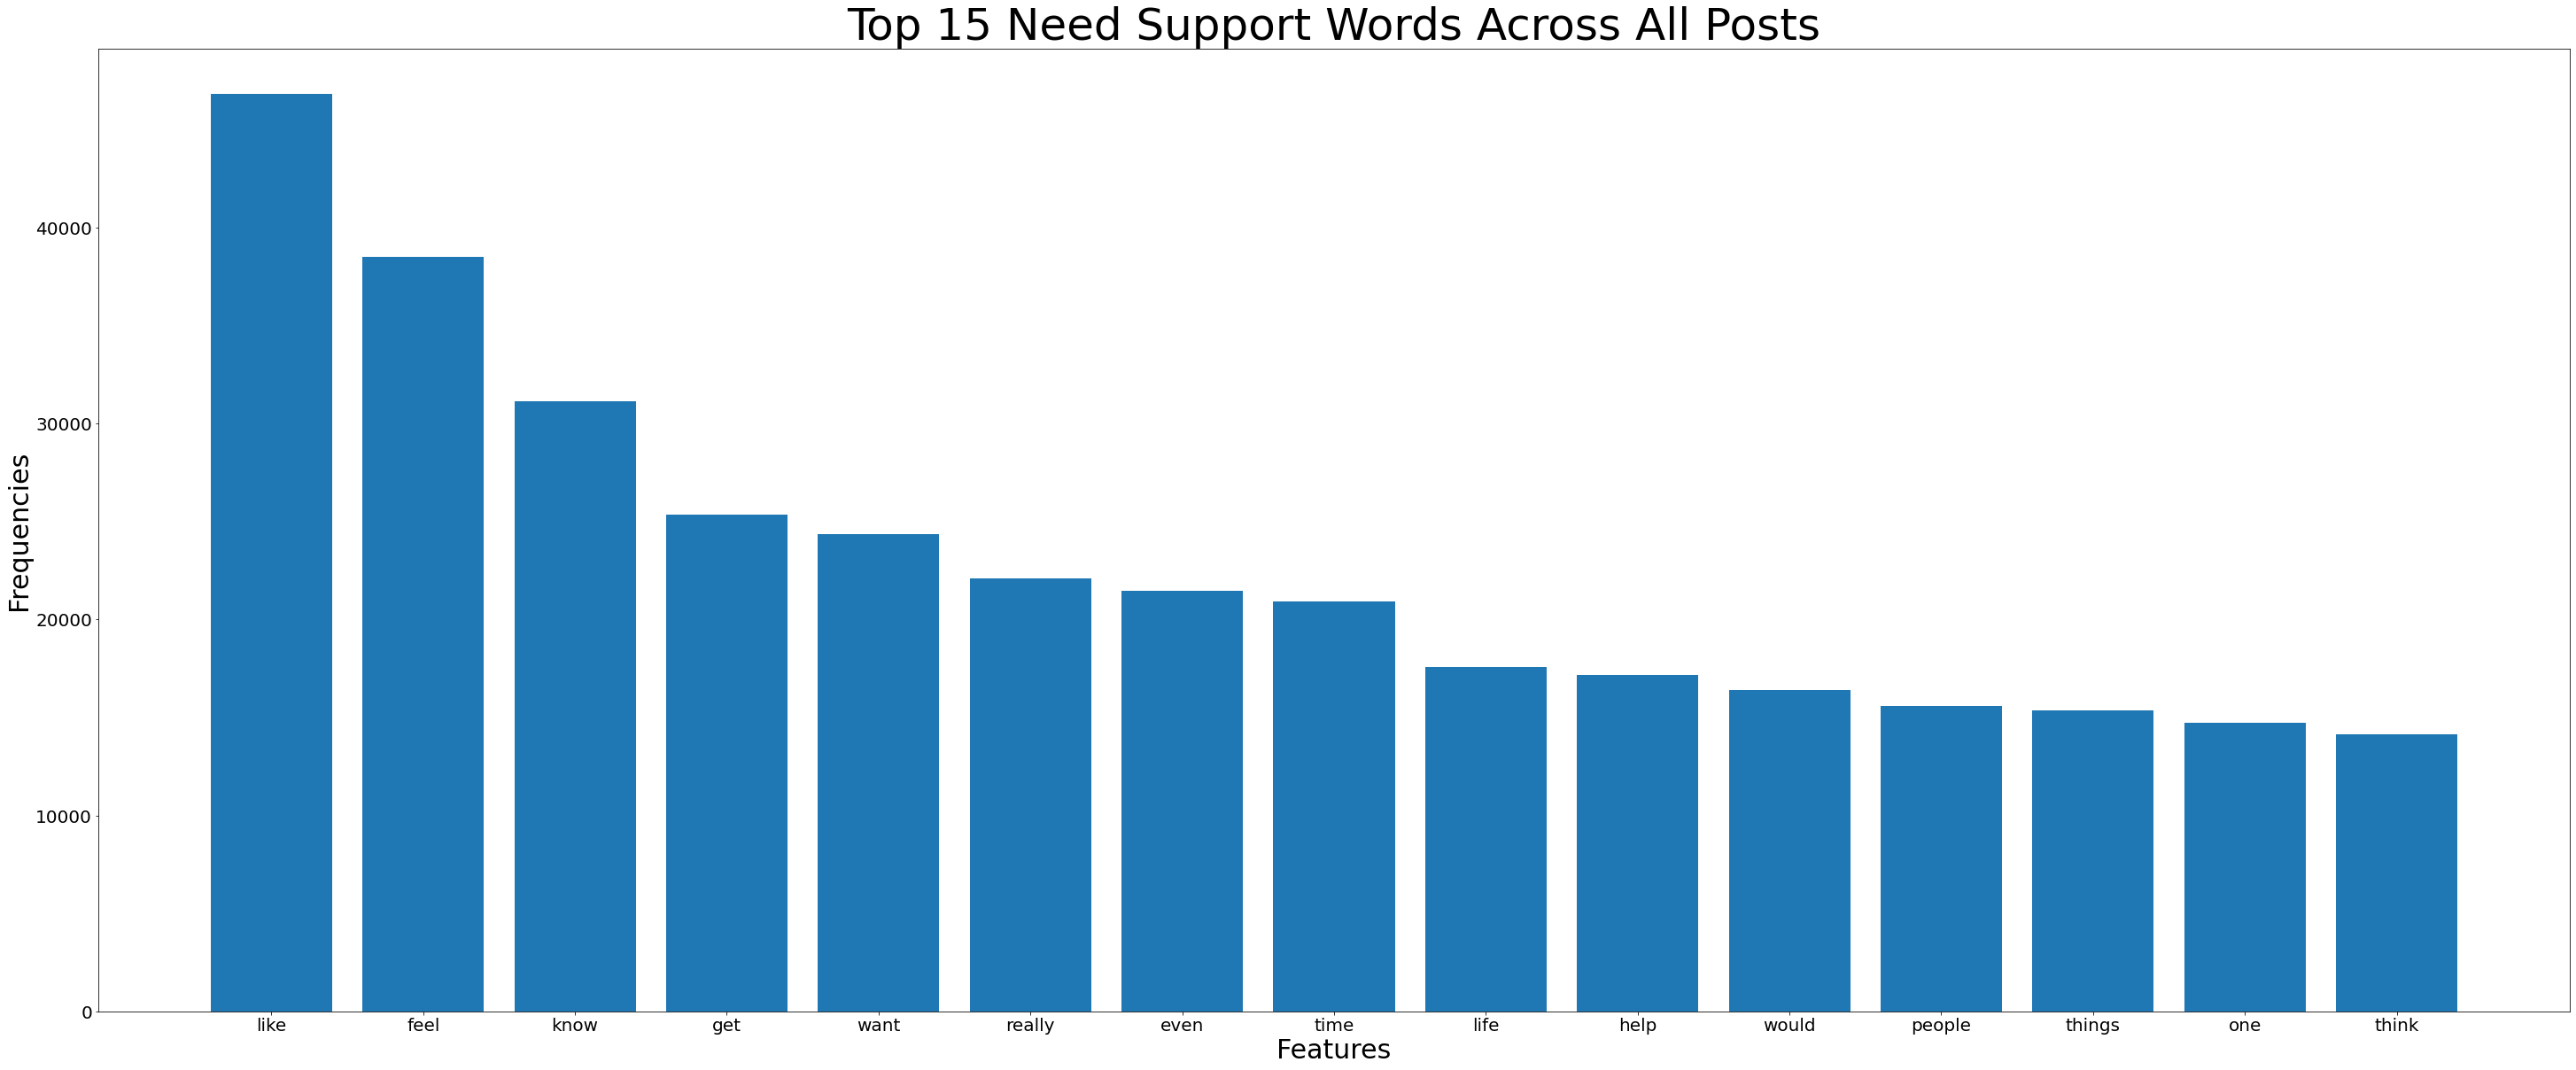

In [31]:
# Extract keys and values from the dictionary
keys= list(ns_top.keys())
values = list(ns_top.values())
bar_width = 0.5
# Plot the bar graph
plt.figure(figsize=(50, 20))
plt.xticks(fontsize=20)  # Adjust the font size of the x-axis tick labels
plt.yticks(fontsize=20)
plt.bar(keys, values)

# Add labels and title
plt.xlabel('Features', fontsize = 30)
plt.ylabel('Frequencies', fontsize = 30)
plt.title('Top 15 Need Support Words Across All Posts', fontsize = 50)

# Show the plot
plt.show()
keys_ns = keys
count_ns = values

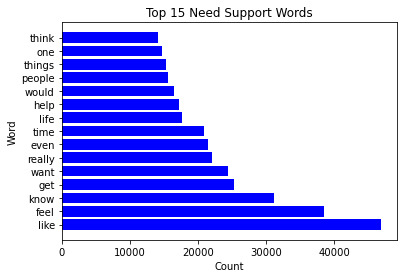

In [32]:
plt.barh(keys_ns, count_ns, color='blue')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 15 Need Support Words')
plt.show()

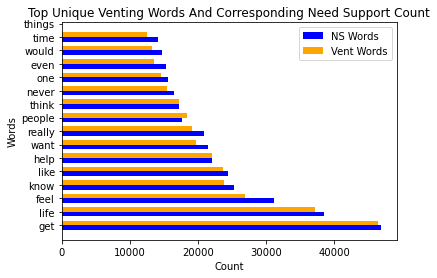

In [33]:
keys_ns= list(ns_top.keys())
values_ns = list(ns_top.values())

keys_vent= list(vent_top.keys())
values_vent = list(vent_top.values())


all_words = set(keys_ns).union(set(keys_vent))
bar_width = 0.35
bar_positions_ns = np.arange(len(keys_ns))
bar_positions_vent = bar_positions_ns + bar_width
bar_positions_total = np.arange(len(all_words))


plt.barh(bar_positions_ns, values_ns, height=bar_width, color='blue', label='NS Words')
plt.barh(bar_positions_vent, values_vent, height=bar_width, color='orange', label='Vent Words')
plt.yticks(bar_positions_total + bar_width / 2, all_words)
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Top Unique Venting Words And Corresponding Need Support Count')
plt.legend()
plt.show()

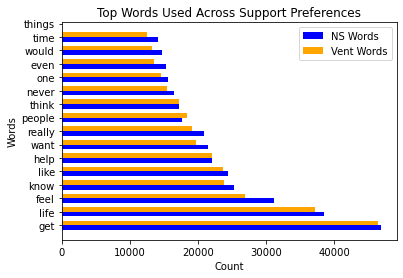

In [34]:
keys_ns= list(ns_top.keys())
values_ns = list(ns_top.values())

keys_vent= list(vent_top.keys())
values_vent = list(vent_top.values())


all_words = set(keys_ns).union(set(keys_vent))
bar_width = 0.35
bar_positions_ns = np.arange(len(keys_ns))
bar_positions_vent = bar_positions_ns + bar_width
bar_positions_total = np.arange(len(all_words))


plt.barh(bar_positions_ns, values_ns, height=bar_width, color='blue', label='NS Words')
plt.barh(bar_positions_vent, values_vent, height=bar_width, color='orange', label='Vent Words')
plt.yticks(bar_positions_total + bar_width / 2, all_words)
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Top Words Used Across Support Preferences')
plt.legend()
plt.show()

### Top 15 unique to NS

In [35]:
set(ns_top.keys()).difference(set(vent_top.keys())) 

{'help'}

### Top 15 unique to Vent

In [36]:
set(vent_top.keys()).difference(set(ns_top.keys())) 

{'never'}

In [37]:
ns_top_150 = dict(sorted(ns_dict.items(), key=itemgetter(1), reverse=True)[:150])
vent_top_150 = dict(sorted(vent_dict.items(), key=itemgetter(1), reverse=True)[:150])

### Intersection of top 150 in both categories

In [38]:
len(set(vent_top_150.keys()).intersection(set(ns_top_150.keys())))

141

### words unique to Vent

In [39]:
unique_vent_top = set(vent_top_150.keys()).difference(set(ns_top_150.keys()))
print(unique_vent_top)

{'wish', 'fucking', 'another', 'put', 'let', 'look', 'tired', 'reason', 'shit'}


In [40]:
unique_vent_count = {}
ns_counter = {}
for val in unique_vent_top:
    print(val)
    unique_vent_count[val] = vent_top_150[val]
    if ns_dict[val]:
        ns_counter[val] = ns_dict[val]
    else:
        ns_counter[val] = 0

wish
fucking
another
put
let
look
tired
reason
shit


In [41]:
unique_vent_count = dict(sorted(unique_vent_count.items(), key=itemgetter(1), reverse=True))

In [42]:
ns_counter

{'wish': 1984,
 'fucking': 2729,
 'another': 3431,
 'put': 3217,
 'let': 3445,
 'look': 3043,
 'tired': 3147,
 'reason': 3312,
 'shit': 3335}

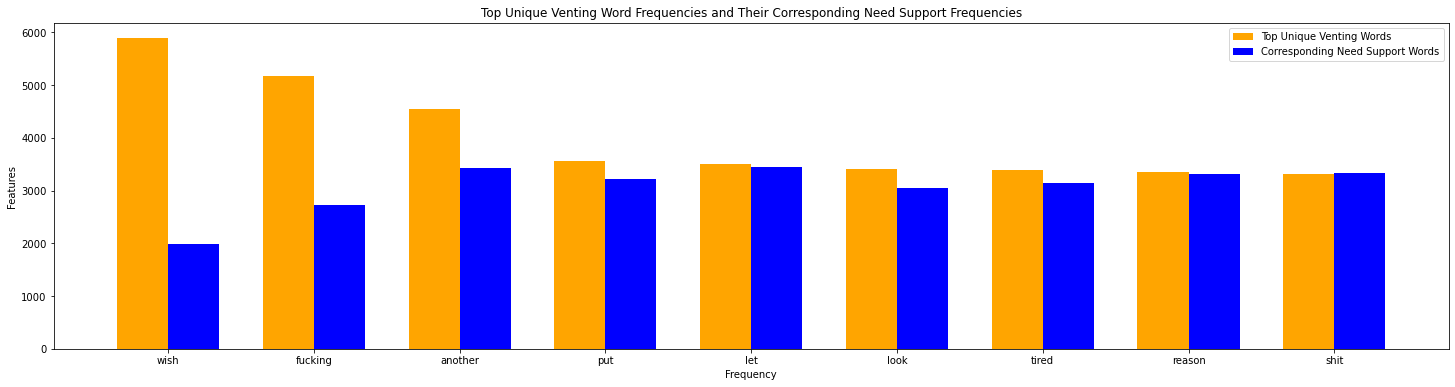

In [43]:
x_ns = ns_counter.keys()
y_ns = ns_counter.values()

x_vent = unique_vent_count.keys()
y_vent = unique_vent_count.values() 
x = range(len(x_vent))
bar_width = 0.35
# Plot the grouped bars
plt.figure(figsize=(25, 6))
plt.bar(x, y_vent, width=bar_width, label='Top Unique Venting Words', color = "orange")
plt.bar([i + bar_width for i in x], y_ns, width=bar_width, label='Corresponding Need Support Words', color = "blue")

# Add labels and title
plt.ylabel('Features')
plt.xlabel('Frequency')
plt.title('Top Unique Venting Word Frequencies and Their Corresponding Need Support Frequencies')
plt.xticks([i + bar_width/2 for i in x], x_ns)  # Center x ticks between the bars
plt.legend()
# Show the plot
plt.show()

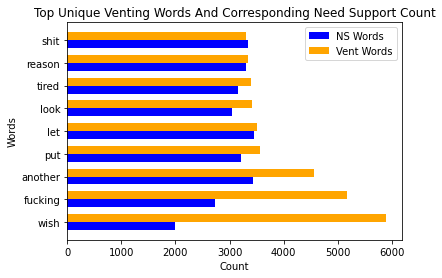

In [44]:
word_ns_1 = list(x_ns)
count_ns_1 = list(y_ns)
word_vent_1 = list(x_vent)
count_vent_1 = list(y_vent)

bar_width = 0.35
bar_positions_ns = np.arange(len(word_ns_1))
bar_positions_vent = bar_positions_ns + bar_width


plt.barh(bar_positions_ns, count_ns_1, height=bar_width, color='blue', label='NS Words')
plt.barh(bar_positions_vent, count_vent_1, height=bar_width, color='orange', label='Vent Words')
plt.yticks(bar_positions_ns + bar_width / 2, word_ns_1)
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Top Unique Venting Words And Corresponding Need Support Count')
plt.legend()
plt.show()

In [45]:
i = 0
for word in word_vent_1:
    print("Proportion of " + word + " in Vent " + str((count_vent_1[i])/(count_vent_1[i] + count_ns_1[i])))
    i+=1

Proportion of fucking in Vent 0.7480314960629921
Proportion of shit in Vent 0.6543819655521783
Proportion of tired in Vent 0.5703731530177811
Proportion of look in Vent 0.5253762171732075
Proportion of let in Vent 0.5041738629821532
Proportion of wish in Vent 0.528436386176972
Proportion of put in Vent 0.5188073394495413
Proportion of reason in Vent 0.5026280222255594
Proportion of another in Vent 0.49811888638073737


In [46]:
count = 0
for i in vent_df["body"]:
    if "look" in i:
        count+=1 
        print("LOOK: " + i)
    if "wish" in i:
        print("WISH: " + i)
        count+=1
    if "tired" in i:
        print("TIRED: " + i)
        count+=1
    if count == 30:
        break


LOOK: last april after i found out my ex had lied to me and some other upsetting things i had a complete breakdown the breakdown ended after i took a brand new razor blade across my wrist i had so much adrenaline i didn t feel it at all but the giant wound and blood projecting from myself shocked me i stared at it for a second i think i tried to hold it closed and my ex said something about to not touch it he pulled me into his bathroom and wrapped a towel around my arm and tied it i m still shocked i think i m crying and looking at him and telling him i m going to die i keep apologizing he says that i m not going to die he says it s not like i didn t know something like this could happen we didn t know what to do so he asks if he could call his mom and i said ok mom she slit her wrist and she s bleeding a lot what should we do she asks a few questions he ends up taking me to the er on campus i m asked all the questions about what happened my mental health so on we re in the er from ar

#### Words like living, wish, maybe, place, mother, and dad appear in the set of top words found in Venting posts that are not in the top set of words found in Need Support posts. 

#### Venting posts more often reference a family member or close relationship. Additionally, venting posts are more likely to contain expletive or deragotory. 

In [47]:
unique_ns_top = set(ns_top_150.keys()).difference(set(vent_top_150.keys()))
print(unique_ns_top)

{'therapist', 'advice', 'therapy', 'please', 'old', 'night', 'relationship', 'lost', 'recently'}


In [48]:
unique_ns_count = {}
vent_counter = {}
for val in unique_ns_top:
    unique_ns_count[val] = ns_top_150[val]
    if vent_dict[val]:
        vent_counter[val] = vent_dict[val]
    else:
        vent_counter[val] = 0

In [49]:
unique_ns_count = dict(sorted(unique_ns_count.items(), key=itemgetter(1), reverse=True))

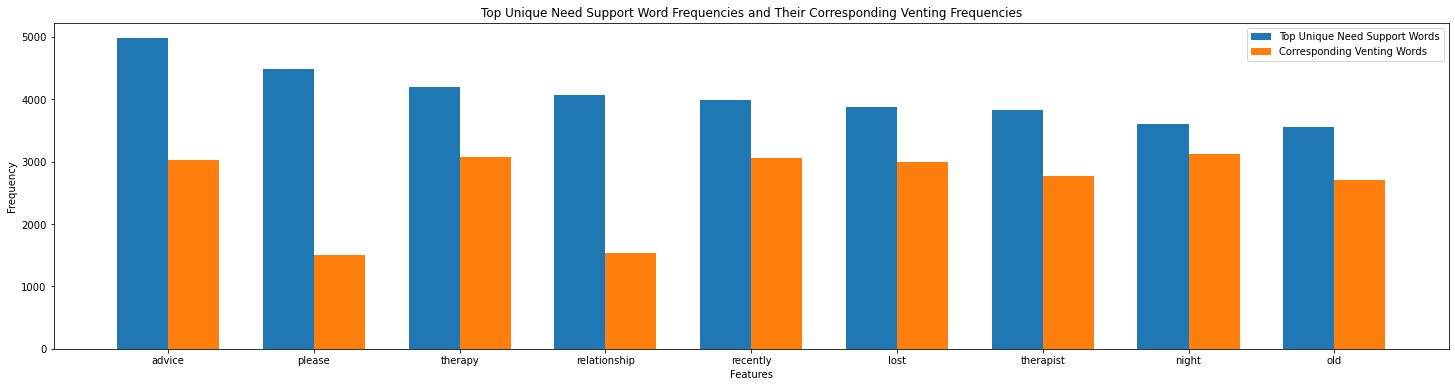

In [50]:
x_ns = unique_ns_count.keys()
y_ns = unique_ns_count.values()

x_vent = vent_counter.keys()
y_vent = vent_counter.values() 
x = range(len(x_vent))
bar_width = 0.35
# Plot the grouped bars
plt.figure(figsize=(25, 6))
plt.bar(x, y_ns, width=bar_width, label='Top Unique Need Support Words')
plt.bar([i + bar_width for i in x], y_vent, width=bar_width, label='Corresponding Venting Words')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Top Unique Need Support Word Frequencies and Their Corresponding Venting Frequencies')
plt.xticks([i + bar_width/2 for i in x], x_ns)  # Center x ticks between the bars
plt.legend()
# Show the plot
plt.show()

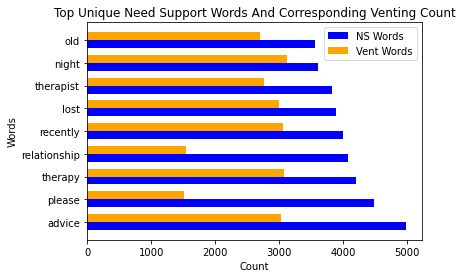

In [51]:
word_ns = list(x_ns)
count_ns = list(y_ns)
word_vent = list(x_vent)
count_vent = list(y_vent)

bar_width = 0.35
bar_positions_ns = np.arange(len(word_ns))
bar_positions_vent = bar_positions_ns + bar_width


plt.barh(bar_positions_ns, count_ns, height=bar_width, color='blue', label='NS Words')
plt.barh(bar_positions_vent, count_vent, height=bar_width, color='orange', label='Vent Words')
plt.yticks(bar_positions_ns + bar_width / 2, word_ns)
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Top Unique Need Support Words And Corresponding Venting Count')
plt.legend()
plt.show()

In [52]:
count = 0
for i in ns_df["body"]:
    if "night" in i:
        count+=1 
        print("NIGHT: " + i)
    if "therapy" in i:
        print("THERAPY :" + i)
        count+=1
    if count == 10:
        break

NIGHT: hi i am a 23 year old male doing an it job as a programmer lately work load has increased drastically but i can keep up with it but its just too much stressfull situations on every single day i recently broke up with my girlfriend on jan 2020 still then i am not able to recover from it evey now and then i will think of her and imagine what could bring her back she has no mood to come back what's so ever due to covid 19 all the situations became dramatically sad enough i am sole bread earner in my family so quitting this job is not an option from last three months i have been feeling so so so low it's like too much emptiness inside of me i tried to distract myself by watching anime and web series but it's just temporary distraction i also lost track of my health not eating enough porn addiction family cannot help me in this situation because they are already feeling low as they lost their jobs due to covid 19 i am feeling very low day by day for myself i do cry a lot in my bed in

In [53]:
i = 0
for word in word_ns:
    print("Difference in count of " + word + " is " + str(count_ns[i] - count_vent[i]))
    i+=1

Difference in count of advice is 1958
Difference in count of please is 2971
Difference in count of therapy is 1126
Difference in count of relationship is 2535
Difference in count of recently is 926
Difference in count of lost is 885
Difference in count of therapist is 1066
Difference in count of night is 490
Difference in count of old is 847


In [54]:
i = 0
for word in word_vent:
    print("Difference in count of " + word + " is " + str(count_vent[i] - count_ns[i]))
    i+=1

Difference in count of therapist is -1958
Difference in count of advice is -2971
Difference in count of therapy is -1126
Difference in count of please is -2535
Difference in count of old is -926
Difference in count of night is -885
Difference in count of relationship is -1066
Difference in count of lost is -490
Difference in count of recently is -847


***night, therapy, advice, please, relationship" are all in the top. Consider analyzing these words***

#### Words like "hi", "today", "alone", "depressed",and "stop" appear as top 30 used words in Need Support posts but not in the top 30 used words in Venting posts. 

#### Starting the post of with a greeting seems to be much more common in Need Support posts, which indicates that the writer is addressing redditors contrary to Venting posts, where this occurs less frequently. 

### Bag of words: 

#### Necessary for future work in word embedding and supervised classification. 

In [55]:
def vec_fun(df_in, m_in, n_in):
    from sklearn.feature_extraction.text import CountVectorizer
    vec_t = CountVectorizer(ngram_range=(m_in, n_in))
    xform_data_t = pd.DataFrame(vec_t.fit_transform(
        df_in).toarray())#be careful may run out of memory
    xform_data_t.columns = vec_t.get_feature_names_out()
    return xform_data_t

In [56]:
df_wordvec = vec_fun(df["body"], 1, 1)

In [57]:
df_wordvec.insert(1, 'Label', df['label'])

In [58]:
df_wordvec

,00,Label,000,0000,00000000000001,00001,0001,0005,000mil,000s,...,zyban,zygo,zylinders,zyn,zyprexa,zyzz,zz,zzz,zzzquil,zzzz
0,0,Venting,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Venting,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Venting,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Venting,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Venting,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48825,0,Venting,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48826,0,Need Support,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48827,0,Need Support,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48828,0,Venting,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
pip install textblob


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Users/anjanarao/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Sentiment Analysis

In [171]:
from textblob import TextBlob

In [184]:
ns_df["body_sw"]

17       life trying getting morning working going clas...
30       hi 23 year old male job programmer lately work...
33       know might best place think subreddit help kno...
34       i've feeling i'm even real imposter syndrome e...
37       undergrad university student nearly 4 weeks 6 ...
                               ...                        
48875    mind business think fight someone know wake se...
48876    i've literally lost every single ounce motivat...
48880    m22 work full time i'm trying fill application...
48882    hi ta account forced live someone narcissistic...
48884    mental health going bad year really know under...
Name: body_sw, Length: 26051, dtype: object

In [172]:
polar_vent = []
for body in vent_df["body_sw"]:
     polar_vent.append(TextBlob(body).sentiment.polarity)

In [173]:
polar_ns = []
for body in ns_df["body_sw"]:
     polar_ns.append(TextBlob(body).sentiment.polarity)

In [174]:
import statistics

In [175]:
mean_vent = statistics.mean(polar_vent)
mean_ns = statistics.mean(polar_ns)

In [176]:
mean_vent

-0.02391544247965423

In [177]:
mean_ns

-0.00768929942683385

In [178]:
mean_vent

-0.02391544247965423

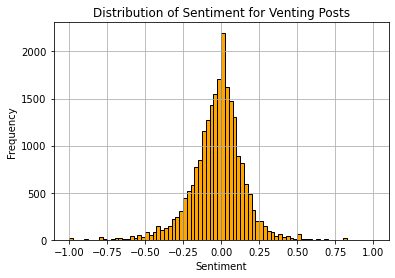

In [179]:
plt.hist(polar_vent, bins=80, edgecolor='black', color = "orange")
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment for Venting Posts')
plt.grid(True)
plt.show()

In [180]:
mean_value = statistics.mean(polar_vent)
print("Mean:", mean_value)

# Median
median_value = statistics.median(polar_vent)
print("Median:", median_value)

# Mode
mode_value = statistics.mode(polar_vent)
print("Mode:", mode_value)

# Standard deviation
std_deviation = statistics.stdev(polar_vent)
print("Standard Deviation:", std_deviation)

Mean: -0.02391544247965423
Median: -0.00984848484848485
Mode: 0.0
Standard Deviation: 0.16782789329642012


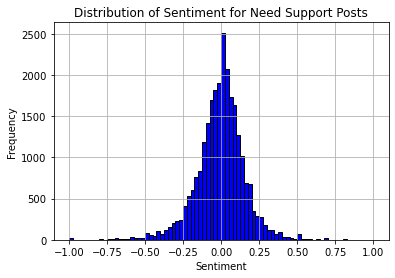

In [181]:
plt.hist(polar_ns, bins=80, edgecolor='black', color = "blue")
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment for Need Support Posts')
plt.grid(True)
plt.show()

In [182]:
mean_value = statistics.mean(polar_ns)
print("Mean:", mean_value)

# Median
median_value = statistics.median(polar_ns)
print("Median:", median_value)

# Mode
mode_value = statistics.mode(polar_ns)
print("Mode:", mode_value)

# Standard deviation
std_deviation = statistics.stdev(polar_ns)
print("Standard Deviation:", std_deviation)

Mean: -0.00768929942683385
Median: 0.0
Mode: 0.0
Standard Deviation: 0.16049284215277243


### How does average sentiment compare across labels?

In [183]:
((mean_ns - mean_vent) / mean_vent) * 100

-67.84797340306194

#### The average sentiment across all Venting posts 69% lower than the average across all Need Support posts.

In [162]:
posts = ns_df["body"].apply(lambda x: x if "therapy" in x else None)

**Feature Importance** Note: This was added after supervised learning 

In [163]:
ft_imp = pd.read_csv("featureImportanceModelB.csv")

In [83]:
ft_imp

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,feature,importance,NaN,NaN,NaN,NaN
1,NaN,advice,0.010646,NaN,NaN,NaN,NaN
2,NaN,please,0.009463,NaN,NaN,NaN,NaN
3,NaN,help,0.008762,NaN,NaN,NaN,NaN
4,NaN,just,0.007587,NaN,NaN,NaN,NaN
5,NaN,vent,0.006695,NaN,NaN,NaN,NaN
6,NaN,any,0.006066,NaN,NaN,NaN,NaN
7,NaN,and,0.005938,NaN,NaN,NaN,NaN
8,NaN,do,0.005934,NaN,NaN,NaN,NaN
9,NaN,to,0.005821,NaN,NaN,NaN,NaN


In [84]:
ft_imp.drop(columns=['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], inplace=True)

In [87]:
ft_imp.rename(columns={'Unnamed: 1': 'feature','feature': "importance" }, inplace=True)

In [89]:
ft_imp = ft_imp.drop(0)

In [90]:
ft_imp

,feature,importance
1,advice,0.010646
2,please,0.009463
3,help,0.008762
4,just,0.007587
5,vent,0.006695
6,any,0.006066
7,and,0.005938
8,do,0.005934
9,to,0.005821
10,it,0.005552


In [91]:
top_ft = ft_imp[:30]

In [92]:
top_ft

,feature,importance
1,advice,0.010646
2,please,0.009463
3,help,0.008762
4,just,0.007587
5,vent,0.006695
6,any,0.006066
7,and,0.005938
8,do,0.005934
9,to,0.005821
10,it,0.005552


In [120]:
ns_dict['any']

KeyError: 'any'

In [124]:
vent_num = []
ns_num = [] 
for word in top_ft["feature"]:
    ns_num.append(ns_dict_body[word])
    vent_num.append(vent_dict_body[word])

In [129]:
ft_imp = ft_imp.drop(30)

In [130]:
len(vent_num)

30

In [134]:
ft_imp["count in vent"]  = vent_num

In [135]:
ft_imp["count in ns"]  = ns_num

In [138]:
ft_imp = ft_imp[:15]

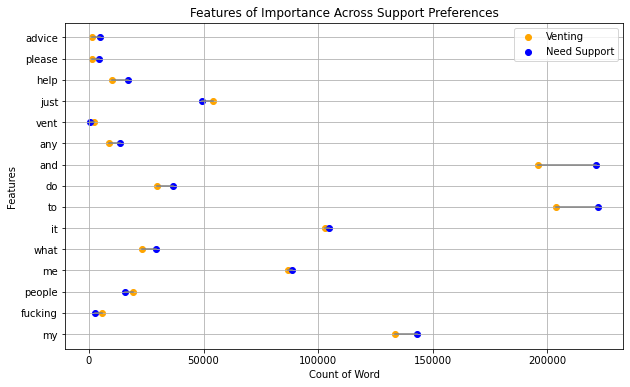

In [141]:
# Sample data
features = list(ft_imp["feature"])
ns = list(ft_imp["count in ns"])
vent = list(ft_imp["count in vent"])
features = features[::-1]
ns = ns[::-1]
vent = vent[::-1]
plt.figure(figsize=(10, 6))
# Plotting the horizontal dumbbell plot for values1 (orange)
plt.scatter(vent, features, color='orange', label='Venting')

# Plotting the horizontal dumbbell plot for values2 (blue)
plt.scatter(ns, features, color='blue', label='Need Support')

# Plotting lines between each blue and orange dot for each category
for i, ft in enumerate(features):
    plt.plot([vent[i], ns[i]], [ft, ft], color='grey', linestyle='-')

# Adding labels and title
plt.xlabel('Count of Word')
plt.ylabel('Features')
plt.title('Features of Importance Across Support Preferences')


# Adding legend
plt.legend()

# Display plot
plt.grid(True)
plt.show()

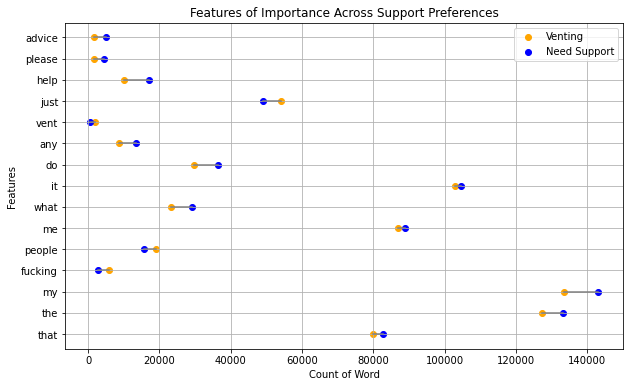

In [144]:
ft_imp = top_ft[:17]
ft_imp = ft_imp.drop(7)
ft_imp = ft_imp.drop(9)
vent_num = []
ns_num = [] 
for word in ft_imp["feature"]:
    ns_num.append(ns_dict_body[word])
    vent_num.append(vent_dict_body[word])
ft_imp["count in vent"]  = vent_num
ft_imp["count in ns"]  = ns_num

# Sample data
features = list(ft_imp["feature"])
ns = list(ft_imp["count in ns"])
vent = list(ft_imp["count in vent"])
features = features[::-1]
ns = ns[::-1]
vent = vent[::-1]
plt.figure(figsize=(10, 6))
# Plotting the horizontal dumbbell plot for values1 (orange)
plt.scatter(vent, features, color='orange', label='Venting')

# Plotting the horizontal dumbbell plot for values2 (blue)
plt.scatter(ns, features, color='blue', label='Need Support')

# Plotting lines between each blue and orange dot for each category
for i, ft in enumerate(features):
    plt.plot([vent[i], ns[i]], [ft, ft], color='grey', linestyle='-')

# Adding labels and title
plt.xlabel('Count of Word')
plt.ylabel('Features')
plt.title('Features of Importance Across Support Preferences')


# Adding legend
plt.legend()

# Display plot
plt.grid(True)
plt.show()